# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# Tidying Up Datasets

## Load Datasets

In [2]:
# Load Tour Guide Datasets
guide_df = pd.read_csv('data/tour-guide-data.csv')
guide_df

,Name,Gender,Domicile,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
0,Nabhan Nabilah,1,0,1,0,0,0,0,0,0,...,5,2,5,5,5,2,2,5,5,2
1,Salsabilla,1,0,1,0,0,0,0,0,1,...,4,3,3,4,4,2,2,2,4,2
2,Maulani,1,0,1,0,0,0,0,1,0,...,4,4,3,4,4,3,3,2,3,3
3,Abiyyu Farhan,0,0,1,0,0,0,0,0,1,...,4,5,3,5,4,4,4,4,4,4
4,Rahmaliyah Kadir,1,1,1,0,0,0,0,0,0,...,4,3,3,4,3,3,3,3,4,3
5,Faizah,1,1,1,0,0,0,0,0,0,...,4,2,5,5,5,3,4,5,5,4
6,Andani,1,1,0,1,0,0,0,0,1,...,4,4,4,3,3,4,3,3,3,3
7,Muthiah Hanun,1,1,0,1,0,0,0,0,0,...,5,5,5,5,5,5,4,3,5,4
8,Ihlasul Mufti Faqih,0,1,1,0,0,0,0,0,1,...,5,4,5,4,3,2,1,3,4,2
9,Dessylva Maharany Santosa,1,0,1,0,0,0,0,1,0,...,3,3,3,4,3,2,3,2,4,3


In [3]:
# Add roles column as a guide
guide_df['Roles'] = 'guide'
guide_df

,Name,Gender,Domicile,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,Roles
0,Nabhan Nabilah,1,0,1,0,0,0,0,0,0,...,2,5,5,5,2,2,5,5,2,guide
1,Salsabilla,1,0,1,0,0,0,0,0,1,...,3,3,4,4,2,2,2,4,2,guide
2,Maulani,1,0,1,0,0,0,0,1,0,...,4,3,4,4,3,3,2,3,3,guide
3,Abiyyu Farhan,0,0,1,0,0,0,0,0,1,...,5,3,5,4,4,4,4,4,4,guide
4,Rahmaliyah Kadir,1,1,1,0,0,0,0,0,0,...,3,3,4,3,3,3,3,4,3,guide
5,Faizah,1,1,1,0,0,0,0,0,0,...,2,5,5,5,3,4,5,5,4,guide
6,Andani,1,1,0,1,0,0,0,0,1,...,4,4,3,3,4,3,3,3,3,guide
7,Muthiah Hanun,1,1,0,1,0,0,0,0,0,...,5,5,5,5,5,4,3,5,4,guide
8,Ihlasul Mufti Faqih,0,1,1,0,0,0,0,0,1,...,4,5,4,3,2,1,3,4,2,guide
9,Dessylva Maharany Santosa,1,0,1,0,0,0,0,1,0,...,3,3,4,3,2,3,2,4,3,guide


In [4]:
# Load Tourist Datasets
tourist_df = pd.read_csv('data/tourist-data.csv')
tourist_df

,Names,Genders,Destinations,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
0,Novia Rizki Wulandari,1,0,1,0,0,0,0,0,1,...,5,4,4,5,5,4,4,2,4,4
1,Herlina Kusyanuri Putri,1,0,1,0,0,0,0,1,0,...,5,5,5,5,5,4,3,3,4,3
2,Rifdah Alyaa,1,0,1,0,0,0,0,0,0,...,2,3,2,3,4,3,2,3,4,3
3,Alexis Purnomo,0,0,0,0,0,0,0,0,1,...,3,5,3,4,5,4,4,1,4,4
4,Rifky Surya Pratama,0,0,1,0,0,0,0,0,1,...,4,3,3,4,4,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Féi,1,1,1,0,0,0,0,0,0,...,4,2,4,4,4,3,4,2,4,4
69,Annisa,1,1,1,0,0,0,0,0,0,...,4,2,3,3,3,3,3,2,4,3
70,Usamah,0,1,1,0,0,0,0,0,1,...,5,5,4,5,5,4,4,5,5,5
71,Helena,1,0,0,0,0,0,0,1,0,...,4,3,4,4,4,3,4,2,5,4


In [5]:
# Add roles columns as a tourist
tourist_df['Roles'] = 'tourist'
tourist_df

,Names,Genders,Destinations,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,Roles
0,Novia Rizki Wulandari,1,0,1,0,0,0,0,0,1,...,4,4,5,5,4,4,2,4,4,tourist
1,Herlina Kusyanuri Putri,1,0,1,0,0,0,0,1,0,...,5,5,5,5,4,3,3,4,3,tourist
2,Rifdah Alyaa,1,0,1,0,0,0,0,0,0,...,3,2,3,4,3,2,3,4,3,tourist
3,Alexis Purnomo,0,0,0,0,0,0,0,0,1,...,5,3,4,5,4,4,1,4,4,tourist
4,Rifky Surya Pratama,0,0,1,0,0,0,0,0,1,...,3,3,4,4,2,3,3,2,3,tourist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Féi,1,1,1,0,0,0,0,0,0,...,2,4,4,4,3,4,2,4,4,tourist
69,Annisa,1,1,1,0,0,0,0,0,0,...,2,3,3,3,3,3,2,4,3,tourist
70,Usamah,0,1,1,0,0,0,0,0,1,...,5,4,5,5,4,4,5,5,5,tourist
71,Helena,1,0,0,0,0,0,0,1,0,...,3,4,4,4,3,4,2,5,4,tourist


## Combine Datasets into Users Datasets

In [6]:
# Check if column names are the same
columns_equal = guide_df.columns.equals(tourist_df.columns)

if columns_equal:
    print("The DataFrames have the same column names.")
else:
    print("The DataFrames do not have the same column names.")

The DataFrames do not have the same column names.


In [7]:
# Get column names from guide_df and tourist_df
guide_columns = set(guide_df.columns)
tourist_columns = set(tourist_df.columns)

# Find the different columns
diff_col_in_guide = guide_columns - tourist_columns
diff_col_in_tourist = tourist_columns - guide_columns

# Print the different columns
print("Different columns in guide_df:", diff_col_in_guide)
print("Different columns in tourist_df:", diff_col_in_tourist)


Different columns in guide_df: {'Domicile', 'Gender', 'Name'}
Different columns in tourist_df: {'Names', 'Genders', 'Destinations'}


In [8]:
# Rename the diff column
guide_df = guide_df.rename(columns={'Name': 'Names'})
guide_df = guide_df.rename(columns={'Gender': 'Genders'})
guide_df = guide_df.rename(columns={'Domicile': 'Destinations'})


In [9]:
# Check if column names are the same
columns_equal = guide_df.columns.equals(tourist_df.columns)

if columns_equal:
    print("The DataFrames have the same column names.")
else:
    print("The DataFrames do not have the same column names.")

The DataFrames have the same column names.


In [10]:
user_df = pd.concat([tourist_df, guide_df])
user_df = user_df.reset_index(drop=True)
user_df

,Names,Genders,Destinations,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,Roles
0,Novia Rizki Wulandari,1,0,1,0,0,0,0,0,1,...,4,4,5,5,4,4,2,4,4,tourist
1,Herlina Kusyanuri Putri,1,0,1,0,0,0,0,1,0,...,5,5,5,5,4,3,3,4,3,tourist
2,Rifdah Alyaa,1,0,1,0,0,0,0,0,0,...,3,2,3,4,3,2,3,4,3,tourist
3,Alexis Purnomo,0,0,0,0,0,0,0,0,1,...,5,3,4,5,4,4,1,4,4,tourist
4,Rifky Surya Pratama,0,0,1,0,0,0,0,0,1,...,3,3,4,4,2,3,3,2,3,tourist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Dera,1,0,1,0,0,0,0,0,0,...,4,5,5,5,4,5,5,5,5,guide
97,Salsabilla Rizki,1,0,1,0,0,0,0,0,1,...,5,5,5,5,5,5,2,3,4,guide
98,Salma,1,0,1,0,0,0,0,1,1,...,5,5,5,5,5,5,4,5,4,guide
99,Deva,1,0,0,1,0,0,0,0,1,...,4,4,3,4,3,4,2,4,3,guide


## Check Summary New Datasets

In [11]:
# Looking at the index of the columns
columns = user_df.columns
for idx, column in enumerate(columns):
    print(f"Column index: {idx}, Column name: {column}")

Column index: 0, Column name: Names
Column index: 1, Column name: Genders
Column index: 2, Column name: Destinations
Column index: 3, Column name: 17-25
Column index: 4, Column name: 26-34
Column index: 5, Column name: 35-43
Column index: 6, Column name: 44-52
Column index: 7, Column name: 52+
Column index: 8, Column name: Historical tours
Column index: 9, Column name: Adventure tours
Column index: 10, Column name: Nature and wildlife tours
Column index: 11, Column name: Culinary tours
Column index: 12, Column name: Wellness and retreat tours
Column index: 13, Column name: Architectural tours
Column index: 14, Column name: Educational tours
Column index: 15, Column name: Shopping tours
Column index: 16, Column name: EXT1
Column index: 17, Column name: EXT2
Column index: 18, Column name: EXT3
Column index: 19, Column name: EXT4
Column index: 20, Column name: EXT5
Column index: 21, Column name: EST1
Column index: 22, Column name: EST2
Column index: 23, Column name: EST3
Column index: 24,

In [12]:
user_df.describe()

,Genders,Destinations,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,Nature and wildlife tours,...,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
count,101.000000,101.000000,101.000000,101.000000,101.0,101.0,101.0,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.702970,0.415842,0.702970,0.049505,0.0,0.0,0.0,0.386139,0.475248,0.653465,...,3.683168,3.396040,3.613861,3.811881,3.841584,3.297030,3.435644,2.910891,3.841584,3.445545
std,0.459229,0.495325,0.459229,0.218002,0.0,0.0,0.0,0.489291,0.501878,0.478239,...,1.009264,1.010734,1.009656,1.046068,0.945861,0.964827,0.973816,1.040183,0.977064,0.994739
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
# Check that we not missing any value after combine columns
print('Is there any missing value? ', user_df.isnull().values.any())
print('How many missing values? ', user_df.isnull().values.sum())

Is there any missing value?  False
How many missing values?  0


# Make Matchmaking Model

In [14]:
# Copy origin user data into match data to use in cluster
match_df = user_df.copy()

In [15]:
# Drop Column that not use for clustering match
match_df.drop(['Names', 'Destinations', 'Roles'], axis=1, inplace=True)
match_df

,Genders,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,Nature and wildlife tours,Culinary tours,...,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
0,1,1,0,0,0,0,0,1,1,0,...,5,4,4,5,5,4,4,2,4,4
1,1,1,0,0,0,0,1,0,0,1,...,5,5,5,5,5,4,3,3,4,3
2,1,1,0,0,0,0,0,0,1,1,...,2,3,2,3,4,3,2,3,4,3
3,0,0,0,0,0,0,0,1,1,0,...,3,5,3,4,5,4,4,1,4,4
4,0,1,0,0,0,0,0,1,1,1,...,4,3,3,4,4,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,0,0,0,0,0,0,1,1,...,5,4,5,5,5,4,5,5,5,5
97,1,1,0,0,0,0,0,1,1,1,...,3,5,5,5,5,5,5,2,3,4
98,1,1,0,0,0,0,1,1,0,1,...,5,5,5,5,5,5,5,4,5,4
99,1,0,1,0,0,0,0,1,1,1,...,4,4,4,3,4,3,4,2,4,3


## Test Match Mulai Dari sini

### Reduce Dimension from Data

In [16]:
match_array = match_df.values
match_array = match_array.astype(float)
match_array

array([[1., 1., 0., ..., 2., 4., 4.],
       [1., 1., 0., ..., 3., 4., 3.],
       [1., 1., 0., ..., 3., 4., 3.],
       ...,
       [1., 1., 0., ..., 4., 5., 4.],
       [1., 0., 1., ..., 2., 4., 3.],
       [0., 1., 0., ..., 5., 4., 5.]])

# Test Load Model

In [17]:
import tensorflow as tf
import requests

In [53]:
# Sample input data for testing
data = {"instances": match_array.tolist()}
data

{'instances': [[1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   4.0,
   2.0,
   4.0,
   4.0,
   3.0,
   3.0,
   3.0,
   1.0,
   2.0,
   3.0,
   5.0,
   5.0,
   4.0,
   4.0,
   4.0,
   5.0,
   4.0,
   4.0,
   5.0,
   5.0,
   4.0,
   4.0,
   2.0,
   4.0,
   4.0],
  [1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   3.0,
   3.0,
   1.0,
   1.0,
   2.0,
   2.0,
   4.0,
   4.0,
   5.0,
   3.0,
   4.0,
   4.0,
   4.0,
   3.0,
   3.0,
   5.0,
   5.0,
   5.0,
   5.0,
   5.0,
   4.0,
   3.0,
   3.0,
   4.0,
   3.0],
  [1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   3.0,
   4.0,
   2.0,
   1.0,
   2.0,
   3.0,
   2.0,
   2.0,
   4.0,
   3.0,
   4.0,
   4.0,
   2.0,
   2.0,
   3.0,
   2.0,
   3.0,
   2.0,
   3.0,
   4.0,
   3.0,
   2.0,
   3.0,
   4.0,
   3.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,


In [54]:
# Send a POST request to the TensorFlow Serving REST API
response = requests.post('http://localhost:8501/v1/models/pca_model:predict', json=data)
predictions = response.json()
predictions

{'predictions': [[-13.9435158, -1.13729322],
  [-14.1652784, 1.01445401],
  [-15.1570883, 0.056917198],
  [-14.620842, -0.859428883],
  [-14.2955132, -0.836076379],
  [-14.8253536, -0.494034469],
  [-15.050601, 0.542518],
  [-13.7639437, -0.229799718],
  [-14.7880182, 0.948896468],
  [-14.0906858, 0.17366749],
  [-14.3346109, -0.527826369],
  [-15.0020657, 0.207515374],
  [-14.4163923, 1.14883],
  [-14.6117907, 0.873388708],
  [-14.3097076, -0.0788436234],
  [-14.9813547, 0.833938062],
  [-14.4167404, -0.597463071],
  [-13.6004696, -0.267953694],
  [-14.9429188, 0.336248517],
  [-14.911376, 0.00356145203],
  [-14.1223898, 1.00652635],
  [-14.1567087, 0.575324714],
  [-14.5268192, 1.24904728],
  [-13.2804565, -0.528081417],
  [-14.2276, -0.218891069],
  [-14.4214573, 1.2188611],
  [-14.5696487, -0.382483482],
  [-14.8917923, 0.379113615],
  [-14.0044069, 0.295146257],
  [-14.4828138, 0.457234114],
  [-15.4128933, -0.176051602],
  [-13.0747099, -0.465394676],
  [-13.7219849, 0.422458291]

In [56]:
# Convert predictions to numpy array
pca_pred = np.array(predictions["predictions"])
pca_pred

array([[-1.39435158e+01, -1.13729322e+00],
       [-1.41652784e+01,  1.01445401e+00],
       [-1.51570883e+01,  5.69171980e-02],
       [-1.46208420e+01, -8.59428883e-01],
       [-1.42955132e+01, -8.36076379e-01],
       [-1.48253536e+01, -4.94034469e-01],
       [-1.50506010e+01,  5.42518000e-01],
       [-1.37639437e+01, -2.29799718e-01],
       [-1.47880182e+01,  9.48896468e-01],
       [-1.40906858e+01,  1.73667490e-01],
       [-1.43346109e+01, -5.27826369e-01],
       [-1.50020657e+01,  2.07515374e-01],
       [-1.44163923e+01,  1.14883000e+00],
       [-1.46117907e+01,  8.73388708e-01],
       [-1.43097076e+01, -7.88436234e-02],
       [-1.49813547e+01,  8.33938062e-01],
       [-1.44167404e+01, -5.97463071e-01],
       [-1.36004696e+01, -2.67953694e-01],
       [-1.49429188e+01,  3.36248517e-01],
       [-1.49113760e+01,  3.56145203e-03],
       [-1.41223898e+01,  1.00652635e+00],
       [-1.41567087e+01,  5.75324714e-01],
       [-1.45268192e+01,  1.24904728e+00],
       [-1.

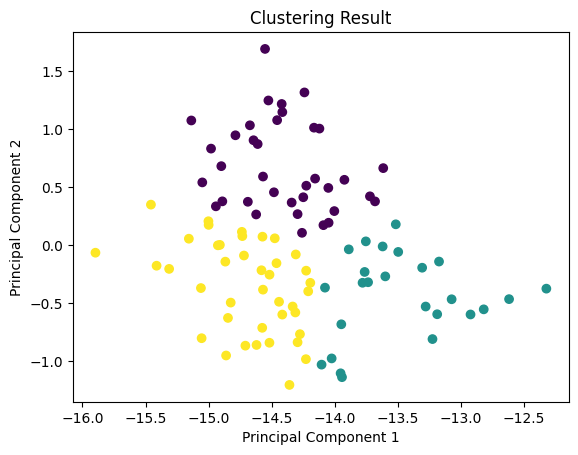

In [57]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans.fit(pca_pred)

# Get the cluster labels for each user
user_clusters = kmeans.labels_

# Plot the clustering result in the reduced feature space
plt.scatter(pca_pred[:, 0], pca_pred[:, 1], c=user_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result')
plt.show()

In [58]:
unique_values, counts = np.unique(user_clusters, return_counts=True)

# Print the unique values and their respective counts
for value, count in zip(unique_values, counts):
    print(f'{value}: {count}')

0: 36
1: 25
2: 40


In [59]:
def matchmaking(user_index):
    # Get the cluster label for the specified user
    user_cluster = user_clusters[user_index]

    # Get the indices of the users within the same cluster as the specified user
    cluster_indices = [i for i, cluster_label in enumerate(user_clusters) if cluster_label == user_cluster]
    # print(cluster_indices)

    # Get the distances within the cluster of the specified user
    cluster_distances = euclidean_distances(pca_pred[cluster_indices])
    # print(len(cluster_distances))
    
    # Get the distances for the specified user
    user_distances = cluster_distances[cluster_indices.index(user_index)]

    # Normalize the distances within the cluster to get the scores within the range of 0-100
    normalized_distances = 1 - user_distances / np.max(user_distances)
    scores = normalized_distances * 100

    # Get the indices and scores of the top 5 closest matches with a score above 80
    matches = [(index, score) for index, score in enumerate(scores) if index != user_index and score > 25]

    # Sort the matches based on the highest score
    matches.sort(key=lambda x: x[1], reverse=True)

    print("User Index:", user_index)
    print("Matched Peers:")
    match_idx = [user_index]
    for match_index, score in matches[:]:
        if user_df.iloc[cluster_indices[match_index], 41] == 'guide':
            if user_df.iloc[cluster_indices[match_index], 2] == user_df.iloc[user_index, 2]:
                match_idx.append(cluster_indices[match_index])
                print("Index:", cluster_indices[match_index], "| Score:", f"{score:.2f}%")
    
    # Check if Destination and roles is correct 
    print()         
    print(user_df.iloc[match_idx, [0, 1, 2, 41]])
    
    # Check if they get same preference
    print()
    print(user_df.iloc[match_idx, 8:16])

In [60]:
# Specify the index of the user you want to find matches for
matchmaking(5)

User Index: 5
Matched Peers:
Index: 81 | Score: 88.40%
Index: 84 | Score: 66.84%
Index: 79 | Score: 60.37%
Index: 86 | Score: 50.83%

                  Names  Genders  Destinations    Roles
5                    JJ        1             1  tourist
81  Ihlasul Mufti Faqih        0             1    guide
84                 Hani        1             1    guide
79               Andani        1             1    guide
86              fadilah        1             1    guide

    Historical tours  Adventure tours  Nature and wildlife tours   
5                  1                1                          1  \
81                 0                1                          1   
84                 0                0                          1   
79                 0                1                          1   
86                 0                1                          0   

    Culinary tours  Wellness and retreat tours  Architectural tours   
5                0                           0   

In [61]:
matchmaking(72)

User Index: 72
Matched Peers:
Index: 75 | Score: 77.32%
Index: 87 | Score: 77.05%
Index: 73 | Score: 70.69%
Index: 98 | Score: 56.95%
Index: 82 | Score: 41.01%

                        Names  Genders  Destinations    Roles
72                       Biru        1             0  tourist
75                    Maulani        1             0    guide
87                      Winda        1             0    guide
73             Nabhan Nabilah        1             0    guide
98                      Salma        1             0    guide
82  Dessylva Maharany Santosa        1             0    guide

    Historical tours  Adventure tours  Nature and wildlife tours   
72                 0                0                          1  \
75                 1                0                          1   
87                 1                0                          1   
73                 0                0                          0   
98                 1                1                          0

In [62]:
new_users = ['Joko', 0, 1, 0,1,0,0,0, 0,1,0,1,0,0,1,0, 	5,5,4,4,4,5,4,4,5,5,4,4,2,4,4,3,4,2,1,2,3,2,2,4,3,'tourist']

In [63]:
len(new_users)

42

In [64]:
# Add the new row using loc indexer
user_df.loc[len(user_df)] = new_users

In [65]:
user_df

,Names,Genders,Destinations,17-25,26-34,35-43,44-52,52+,Historical tours,Adventure tours,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,Roles
0,Novia Rizki Wulandari,1,0,1,0,0,0,0,0,1,...,4,4,5,5,4,4,2,4,4,tourist
1,Herlina Kusyanuri Putri,1,0,1,0,0,0,0,1,0,...,5,5,5,5,4,3,3,4,3,tourist
2,Rifdah Alyaa,1,0,1,0,0,0,0,0,0,...,3,2,3,4,3,2,3,4,3,tourist
3,Alexis Purnomo,0,0,0,0,0,0,0,0,1,...,5,3,4,5,4,4,1,4,4,tourist
4,Rifky Surya Pratama,0,0,1,0,0,0,0,0,1,...,3,3,4,4,2,3,3,2,3,tourist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Salma,1,0,1,0,0,0,0,1,1,...,5,5,5,5,5,5,4,5,4,guide
99,Deva,1,0,0,1,0,0,0,0,1,...,4,4,3,4,3,4,2,4,3,guide
100,Dzaky,0,0,1,0,0,0,0,0,1,...,5,5,5,5,5,5,5,4,5,guide
101,Joko,0,1,0,1,0,0,0,0,1,...,4,2,1,2,3,2,2,4,3,tourist


In [71]:
new_data_match = [new_users[1:2] + new_users[3:41]]
new_data_match = np.array(new_data_match).astype(float)
new_data_match

array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 5., 5.,
        4., 4., 4., 5., 4., 4., 5., 5., 4., 4., 2., 4., 4., 3., 4., 2.,
        1., 2., 3., 2., 2., 4., 3.]])

In [72]:
# Sample input data for testing
new_data = {"instances": new_data_match.tolist()}
new_data

{'instances': [[0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   5.0,
   5.0,
   4.0,
   4.0,
   4.0,
   5.0,
   4.0,
   4.0,
   5.0,
   5.0,
   4.0,
   4.0,
   2.0,
   4.0,
   4.0,
   3.0,
   4.0,
   2.0,
   1.0,
   2.0,
   3.0,
   2.0,
   2.0,
   4.0,
   3.0]]}

In [74]:
# Send a POST request to the TensorFlow Serving REST API
response = requests.post('http://localhost:8501/v1/models/pca_model:predict', json=new_data)
predictions = response.json()
predictions

{'predictions': [[-17.3748055, 1.78813934e-07]]}

In [75]:
# Convert predictions to numpy array
new_pca = np.array(predictions["predictions"])
new_pca

array([[-1.73748055e+01,  1.78813934e-07]])

In [76]:
new_user_cluster = kmeans.predict(new_pca)
new_user_cluster

array([2])

In [77]:
user_clusters = np.append(user_clusters, new_user_cluster)

In [78]:
user_clusters.shape

(102,)

In [79]:
pca_pred.shape

(101, 2)

In [80]:
pca_data_test = pca_pred.copy()

In [81]:
pca_data_test

array([[-1.39435158e+01, -1.13729322e+00],
       [-1.41652784e+01,  1.01445401e+00],
       [-1.51570883e+01,  5.69171980e-02],
       [-1.46208420e+01, -8.59428883e-01],
       [-1.42955132e+01, -8.36076379e-01],
       [-1.48253536e+01, -4.94034469e-01],
       [-1.50506010e+01,  5.42518000e-01],
       [-1.37639437e+01, -2.29799718e-01],
       [-1.47880182e+01,  9.48896468e-01],
       [-1.40906858e+01,  1.73667490e-01],
       [-1.43346109e+01, -5.27826369e-01],
       [-1.50020657e+01,  2.07515374e-01],
       [-1.44163923e+01,  1.14883000e+00],
       [-1.46117907e+01,  8.73388708e-01],
       [-1.43097076e+01, -7.88436234e-02],
       [-1.49813547e+01,  8.33938062e-01],
       [-1.44167404e+01, -5.97463071e-01],
       [-1.36004696e+01, -2.67953694e-01],
       [-1.49429188e+01,  3.36248517e-01],
       [-1.49113760e+01,  3.56145203e-03],
       [-1.41223898e+01,  1.00652635e+00],
       [-1.41567087e+01,  5.75324714e-01],
       [-1.45268192e+01,  1.24904728e+00],
       [-1.

In [82]:
pca_data_test = np.append(pca_data_test, new_pca, axis=0)

In [89]:
pca_data_test.shape

(102, 2)

In [90]:
pca_pred = pca_data_test.copy()

In [91]:
pca_pred[101]

array([-1.73748055e+01,  1.78813934e-07])

In [92]:
def matchmaking_test(user_index):
    # Get the cluster label for the specified user
    user_cluster = user_clusters[user_index]

    # Get the indices of the users within the same cluster as the specified user
    cluster_indices = [i for i, cluster_label in enumerate(user_clusters) if cluster_label == user_cluster]
    print(cluster_indices)
    # print(len(pca_data))
    cluster_indices.append(98)
    cluster_indices.append(100)
    print(cluster_indices)

    # Get the distances within the cluster of the specified user
    cluster_distances = euclidean_distances(pca_pred[cluster_indices])
    # print(len(cluster_distances))
    
    # Get the distances for the specified user
    user_distances = cluster_distances[cluster_indices.index(user_index)]
    # print(user_distances)

    # Normalize the distances within the cluster to get the scores within the range of 0-100
    normalized_distances = 1 - user_distances / np.max(user_distances)
    scores = normalized_distances * 100

    # Get the indices and scores of the top 5 closest matches with a score above 80
    matches = [(index, score) for index, score in enumerate(scores) if index != user_index and score >= 0]

    # Sort the matches based on the highest score
    matches.sort(key=lambda x: x[1], reverse=True)

    print("User Index:", user_index)
    print("Matched Peers:")
    match_idx = [user_index, 100, 99, 98, 97]
    for match_index, score in matches[:]:
        if user_df.iloc[cluster_indices[match_index], 41] == 'guide':
            # if user_df.iloc[cluster_indices[match_index], 2] == user_df.iloc[user_index, 2]:
                match_idx.append(cluster_indices[match_index])
                print("Index:", cluster_indices[match_index], "| Score:", f"{score:.2f}%")
    
    # Check if Destination and roles is correct 
    print()         
    print(user_df.iloc[match_idx, [0, 1, 2, 41]])
    
    # Check if they get same preference
    print()
    print(user_df.iloc[match_idx, 8:16])

In [93]:
matchmaking(101)

User Index: 101
Matched Peers:
Index: 86 | Score: 37.14%

       Names  Genders  Destinations    Roles
101     Joko        0             1  tourist
86   fadilah        1             1    guide

     Historical tours  Adventure tours  Nature and wildlife tours   
101                 0                1                          0  \
86                  0                1                          0   

     Culinary tours  Wellness and retreat tours  Architectural tours   
101               1                           0                    0  \
86                1                           1                    0   

     Educational tours  Shopping tours  
101                  1               0  
86                   0               0  
